# Algorithm Study Week 1

## 1. The Role of Algorithms of Computing

## 알고리즘
알고리즘이란 잘 짜여진 컴퓨터 Procedure
어떤 set의 값들을 input으로 받고, 어떤 set의 값들을 output으로 도출함 
즉, 컴퓨터상의 step의 연속 (input을 output으로 transform)
모든 input에 대해서 올바른 output을 도출할 때 CORRECT 함

## 알고리즘 문제 유형
- NP-complete problems = 효율적인 algorithm을 찾지 못했으나, 아무도 효율적인 알고리즘이 없다고 증명하지 못하는 사례

- 몇몇의 NP-complete 효율적인 알고리즘이 존재한다고 알려진 사례들은 비슷하나, 동일하지는 않음

- NP-complete의 문제 세트는 그 중 하나에 대해 효율적인 알고리즘이 존재 할 경우 모든 알고리즘에 대해 효율적인 알고리즘이 존재한다는 특성이 존재

- 어떤 문제가 NP-complete 문제임을 보인다면, 효율적인 알고리즘(the best)보다 좋은 결과를 도출하는 알고리즘(better)을 찾아야함 

어떤 알고리즘의 correctness 파악할 때
- Initialization : 첫 번째 반복문 시작 전에 true여야 함
- Maintenance : 다음 반복문 시작전에 true여야 함 
- Termination : 반복문이 종료 된 후, '불변성'은 알고리즘이 정확한지 보여주는 좋은 속성을 준다.

## 알고리즘의 복잡도 계산
- Running Time : 기본 작업의 수, 실행된 step의 수. 여기서, i 번째 줄을 실행할 때마다 시간 ci가 걸리며, ci는 상수임을 가정함 = 총 running time은 각각의 statement가 실행되는 running time의 합 T(n) (input size의 function)

- 복잡도 계산할 때 Worst Case에서의 상황을 고려하여 계산하며, 최고 차원만을 고려한다(실제로 큰 n에 대해서 나머지 차원은 유의미하지 않음)

- Rate of Growth (Order Of Growth) of running time : Θ(𝑛2)vs. Θ(𝑛3) 이런식으로 input size에 대해서 몇차원의 function으로 나오는지 파악

## 2. Getting Started

## 2-1 insertion sort (삽입 정렬)

- 삽입 정렬은 두 번째 자료부터 시작하여 그 앞(왼쪽)의 자료들과 비교하여 삽입할 위치를 지정한 후 자료를 뒤로 옮기고 지정한 자리에 자료를 삽입하여 정렬하는 알고리즘이다.
- 첫 Key 값은 두 번째 자료부터 시작한다.
>참고 링크 : https://gmlwjd9405.github.io/2018/05/06/algorithm-insertion-sort.html


In [24]:
def insertion_sort(A):
    """
    the Function that gives the sorted version of A
    """
    for j in range(1,len(A)):
        key = A[j]
        i = j-1 
        while (i>=0) & (A[i]>key):
            A[i+1] = A[i]
            i += -1
        A[i+1] = key
    return(A)

In [25]:
ex = [5,2,4,6,1,3]

In [ ]:
insertion_sort(ex)

Loop invariants : 각 반복문이 시작하기 전에 A[1,,,j-1]는 원래 원소를 가지며, sorted order를 가짐

- Initialization
j=2 부터 첫 번째 반복문이 들어가기 전에, A[1]는 하나의 원소를 가지므로 sorted하여 loop invariants 만족

- Maintenanace
for문은 A[j-1], A[j-2], A[j-3] 이런식으로 움직이면서 올바른 A[j]을 찾을때까지 반복 나머지 subarray는 원래 원소를 가지고 있으면서 sorted order를 만족

- Termination
for문은 j = n+1일 때 종료된다. Loop invariant에서 j에 n+1을 대입해보았을 때, subarray A[1..n]은 원래 원소를 가지며, sorted order를 유지함 (전체 array가 sorted 되었음) 

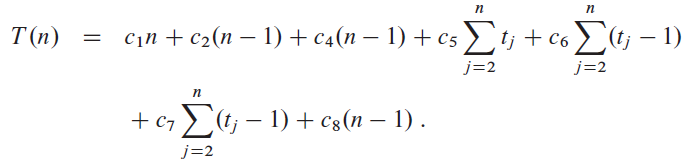

삽입 정렬의 경우 worst case일 때 tj (while 반복문 5번째 라인에서 검사하는 횟수)가 j-1이므로 n에대한 quadratic function으로 나옴 𝚯(𝒏𝟐)

입력 자료가 역순인 경우 worst case

## 2-2  merge sort (합병 정렬)

- 주어진 수열을 가운데에서 분할하여 두개로 쪼깸 (1이 될때까지 = base case)

- 정렬된 부분 배열들을 병합

- 정렬된 두 부분 수열을 합치는 데는 두 수열의 길이 합만큼 반복문을 수행 (그 전에 Subarray는 정렬이 되어 있기 때문에 첫 번째 원소가 보면서 합침)

- 병합 정렬의 수행시간은 병합 과정이 지배

- 아래 단계로 내려갈 수록 부분 문제의 수는 두 배로 늘어나는 대신 부분 문제의 크기 또한 반으로 줄어들기 때문에, 항상 𝚯(𝒏1)으로 일정

- 반으로 나누어 지기 때문에 총 단계 수는 log(n) <= 2^n = x, n = log (x)(밑이 2)

###  Divide and Conquer Algorithm (분할정복법)

- 해결하고자 하는 문제를 둘 이상의 부분 문제로 나눈 뒤, 분할된 문제에 대한 답을 재귀 호출을 이용해 계산하고, 이를 통해 전체 문제의 답을 구하는 디자인
<br>
- 하나 vs 나머지로 나누는 일반적인 재귀함수(a)와 달리 거의 같은 크기의 부분 문제로(b)로 나눔.
<br>
- 분할정복은 보통 세 단계로 진행된다.
    - ⓐ 분할(divide) 단계 : 해결하고자 하는 문제를 작은 크기의 동일한 문제들로 분할
    - ⓑ 정복(conquer) 단계 : 각각의 작은 문제를 동일한 방법으로 순환적(recursive)으로 해결
    - ⓒ 합정(merge) 단계 : 작은 문제의 해를 합하여(merge) 원래 문제에 대한 해를 구함  
<br>
- 분할(Divde), 병합(Merge), 곧장 풀 수 있는 작은 기저 문제 (Base case)로 구성
<br>
- 문제를 둘 이상의 부분 문제로 나누는 자연스러운 방법이 있어야 하며, 부분 문제의 답을 조합해 원래 문제의 답을 계산하는 방법이 존재해야함

>참고 링크 : https://jackpot53.tistory.com/68 / https://kimch3617.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EB%B6%84%ED%95%A0%EC%A0%95%EB%B3%B5%EB%B2%95-Divide-and-Conquer

In [47]:
def merge(left, right):
    total = []
    while (len(left) > 0)|(len(right) > 0):
        if (len(left) > 0) & (len(right) > 0):
            if left[0] <= right[0]:
                total.append(left[0])
                left = left[1:]
            else:
                total.append(right[0])
                right = right[1:]
        elif len(left) > 0:
            total.append(left[0])
            left = left[1:]
        elif len(right) > 0:
            total.append(right[0])
            right = right[1:]
    return total

In [77]:
# assuming that left and right are sorted 
def merge(left, right):
    n1 = len(left)
    n2 = len(right)
    A=[]
    left.append(float('inf'))
    right.append(float('inf'))
# inf를 추가해서 한 쪽이 다 쓸 때 나머지가 들어갈 수 있게 
# inf보다 항상 작으므로
    i=0; j=0
    for k in range(n1+n2):
        if left[i] <= right[j]:
            A.append(left[i])
            i += 1
        else:
            A.append(right[j])
            j += 1
    return A

In [73]:
def merge_sort(A):
    if len(A) <= 1:
        return A
    q = len(A) // 2
    left = A[:q]
    right = A[q:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left,right)

In [65]:
ex = [5,2,4,6,1,3,5,6,7]

In [76]:
merge_sort(ex)

[1, 2, 3, 4, 5, 5, 6, 6, 7]

### Merge sort 시간 복잡도

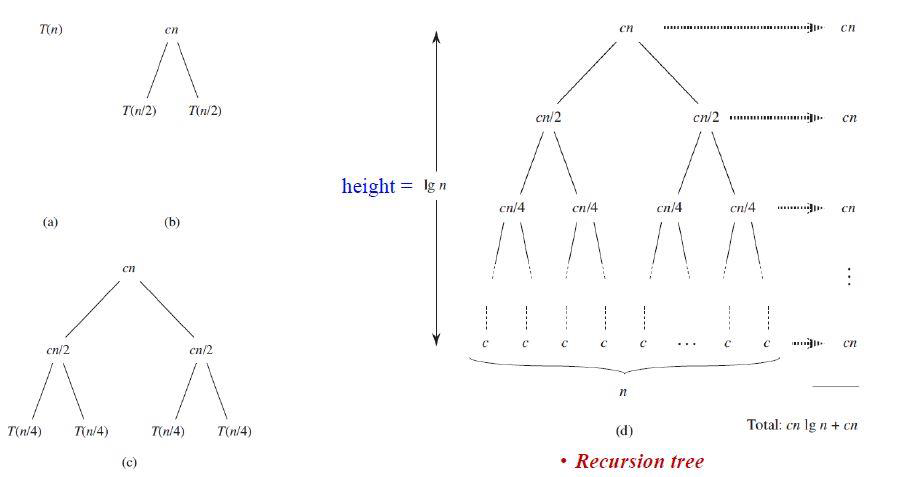

- **Θ(𝑛lg𝑛).**
- 가령 3개로 쪼갤 경우 전체 층의 수는 log(3)n이 되는데, 이는 로그의 성질에 의해 log(2)3 × log(2)n과 같다. 첫째 항은 상수이므로 매 층마다 3개씩 쪼개도 합병정렬의 계산복잡성은 Θ(𝑛lg𝑛)로 동일하다.

> 참고 링크 : https://pro-programmer.tistory.com/entry/kway-Merge-Sort%ED%95%A9%EB%B3%91-%EC%A0%95%EB%A0%AC%EC%9D%98-%EC%8B%9C%EA%B0%84%EB%B3%B5%EC%9E%A1%EB%8F%84-%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0  or <br> https://gmlwjd9405.github.io/2018/05/08/algorithm-merge-sort.html 

## 프로그래머스 코딩 (정렬)

## K 번째 수 

In [12]:
def solution(array, commands):
    """
    commands 가 주어질때 첫번째 원소 i 두번째 원소 j 세번째 원소 k라고 하면
    array를 i부터 j까지 짜르고, k번째로 큰 수를 추출하는 함수
    """
    answer=[]
    for i in range(len(commands)):
        n1 = commands[i][0]-1; n2 = commands[i][1]-1
        n3 = commands[i][2]-1
        temp = sorted(array[n1:n2+1])[n3]
        answer.append(temp)
    return answer

In [13]:
# Simple example

sample = [1, 5, 2, 6, 3, 7, 4]
a = [[2, 5, 3], [4, 4, 1], [1, 7, 3]]
solution (sample,a)

[5, 6, 3]

## 가장 큰 수

> sort는 비교 작업을 위해 호출할 수 있는 선택적 함수를 허용 하는데 두 개의 인자를 비교할 때, 첫 번째가 두 번째보다 작으면 음수, 같으면 0을 반환하고 크면 양수 값을 반환해야 한다.

In [5]:
import functools
"""
str로 들어온 두 인자를 int로 바꾸고 앞자리에 어떤걸 넣어야지 
큰 지를 나타내는 함수 
a>b 가 true이면 1, false면 0을 이용
"""
def compare(a,b):
    temp1 = int(a+b); temp2 = int(b+a)
    return((temp1 > temp2)-(temp1 < temp2))
# temp1이 더 크면 1, 더 작으면 -1 같으면 0을 출력

In [6]:
def solution(numbers):
    """
    string으로 들어온 숫자를 조합해서 가장 큰 수를 string으로 표시하는 함수
    너무 큰 수가 나올때 inf로 나오는거 방지해서 string으로 표시
    """
    temp = list(map(str,numbers))
    sort = sorted(temp, key = functools.cmp_to_key(compare), reverse = True)
    return str(int(''.join(sort)))
# 0으로 시작하는 거 방지 (어쨌든 숫자가 str으로 반환되어야 하므로)

In [10]:
# Simple example

a = ['9', '5', '34', '30', '0']
solution(a)

'9534300'